###Installing required packages

In [ ]:
pip install -q numpy>=1.25.0


In [ ]:
pip install -q pandas==2.0.3


In [ ]:
pip install --pre pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.7 M

In [ ]:
pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.9 MB/s eta 0:00:00


In [ ]:
pip install imbalanced-learn -q

###Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import shap
import time




###Auto ML with pycaret Primary Data

PyCaret is an open-source, low-code Python machine learning library that automates machine learning workflows, making experimentation faster and more efficient.

With the help of Pycaret in both basic and balanced data modes, we were able to find a baseline for the models we want to build ourselves.

In [ ]:
from pycaret.classification import *

In [ ]:
df = pd.read_csv('/content/IT_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
setup(df,target = 'Churn', session_id=85, remove_outliers=True)

,Description,Value
0,Session id,85
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 20)"
5,Transformed data shape,"(6796, 41)"
6,Transformed train set shape,"(4683, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Numeric features,3
9,Categorical features,16


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7832,0.0000,0.7832,0.7773,0.7785,0.4230,0.4258,0.6860
rf,Random Forest Classifier,0.7824,0.0000,0.7824,0.7749,0.7764,0.4152,0.4188,1.0170
knn,K Neighbors Classifier,0.7791,0.0000,0.7791,0.7724,0.7748,0.4131,0.4146,0.6080
lr,Logistic Regression,0.7738,0.0000,0.7738,0.7752,0.7216,0.2427,0.3202,1.7580
lightgbm,Light Gradient Boosting Machine,0.7592,0.0000,0.7592,0.7544,0.7553,0.3654,0.3677,1.0930
xgboost,Extreme Gradient Boosting,0.7580,0.0000,0.7580,0.7411,0.7419,0.3122,0.3237,0.9320
qda,Quadratic Discriminant Analysis,0.7570,0.0000,0.7570,0.7314,0.7107,0.2181,0.2577,0.6420
et,Extra Trees Classifier,0.7497,0.0000,0.7497,0.7266,0.6834,0.1409,0.2046,0.8610
ridge,Ridge Classifier,0.7448,0.0000,0.7448,0.7200,0.6668,0.1001,0.1672,0.5710
lda,Linear Discriminant Analysis,0.7444,0.0000,0.7444,0.7180,0.6670,0.1005,0.1660,0.6950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
my_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6349,0.0000,0.6349,0.6751,0.6500,0.1556,0.1594
1,0.4381,0.0000,0.4381,0.7428,0.4251,0.1121,0.1945
2,0.5030,0.0000,0.5030,0.6775,0.5238,0.1040,0.1343
3,0.6673,0.0000,0.6673,0.7330,0.6852,0.2807,0.2977
4,0.5436,0.0000,0.5436,0.7075,0.5652,0.1599,0.2001
5,0.5071,0.0000,0.5071,0.6741,0.5291,0.1021,0.1297
6,0.5436,0.0000,0.5436,0.6890,0.5675,0.1388,0.1679
7,0.5517,0.0000,0.5517,0.7029,0.5746,0.1601,0.1955
8,0.5984,0.0000,0.5984,0.6564,0.6183,0.1096,0.1144


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

###Auto ML with balance data

In this step, we remove outlier data from the dataframe using pycaret.

In [ ]:
setup(df, target='Churn', fix_imbalance=True, session_id=85, remove_outliers=True)


,Description,Value
0,Session id,85
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 20)"
5,Transformed data shape,"(8957, 41)"
6,Transformed train set shape,"(6844, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Numeric features,3
9,Categorical features,16


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7919,0.0000,0.7919,0.7791,0.7703,0.3794,0.4054,1.2960
nb,Naive Bayes,0.7807,0.0000,0.7807,0.7693,0.7699,0.3913,0.3995,1.0460
rf,Random Forest Classifier,0.7722,0.0000,0.7722,0.7685,0.7667,0.3943,0.4001,1.1690
qda,Quadratic Discriminant Analysis,0.7586,0.0000,0.7586,0.7355,0.7039,0.1986,0.2479,0.7240
svm,SVM - Linear Kernel,0.7562,0.0000,0.7562,0.7920,0.7496,0.3896,0.4191,0.8410
et,Extra Trees Classifier,0.7505,0.0000,0.7505,0.7258,0.6876,0.1523,0.2108,1.1270
ridge,Ridge Classifier,0.7438,0.0000,0.7438,0.7152,0.6677,0.1017,0.1649,0.6400
lda,Linear Discriminant Analysis,0.7434,0.0000,0.7434,0.7134,0.6675,0.1009,0.1628,0.7350
xgboost,Extreme Gradient Boosting,0.7389,0.0000,0.7389,0.7264,0.6932,0.1892,0.2309,0.9870
dummy,Dummy Classifier,0.7347,0.0000,0.7347,0.5398,0.6223,0.0000,0.0000,0.5800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=85, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Data Preparation

In this step, based on the EDA we have done, we will prepare the data for modeling.

In fact, we could have used LabelEncoder and OneHotEncoder in this section, but for some reason we used the apply function.

In [ ]:
def preparation(dataframe):
    df = pd.read_csv(dataframe)

    df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


    df['gender'] = df['gender'].apply(lambda x : 0 if x == 'Female' else 1)

    features_1 = ['Partner','Dependents','PhoneService','MultipleLines','PaperlessBilling','Churn']
    for feature_1 in features_1:
        df[feature_1] = df[feature_1].apply(lambda x : 0 if x =='No' else 1)

    features_2 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
    for feature_2 in features_2:
        df[feature_2] = df[feature_2].apply(lambda x: 0 if x in ('No', 'No internet service') else 1)

    df['InternetService'] = df['InternetService'].apply(lambda x: 0 if x == 'DSL' else (1 if x == 'Fiber optic' else 2))

    df['Contract'] = df['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else (1 if x == 'One year' else 2))

    df['PaymentMethod'] = df['PaymentMethod'].apply(lambda x: 0 if x == 'Electronic check' else (1 if x == 'Mailed check' else (2 if x == 'Bank transfer (automatic)' else 3)))



    return df





In [ ]:
df = preparation(dataframe = '/content/IT_customer_churn.csv')
df.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2667,0,0,0,0,72,1,1,1,1,1,1,1,1,1,2,0,3,115.05,8405.00,0
4839,1,1,0,0,7,1,1,1,0,0,0,0,0,0,0,0,1,73.75,545.15,1
4918,1,0,1,1,51,1,0,2,0,0,0,0,0,0,2,0,3,19.55,1086.75,0
119,1,0,1,1,27,1,1,1,0,1,0,1,0,0,0,1,3,85.20,2151.60,0
6521,0,0,1,1,18,1,1,2,0,0,0,0,0,0,2,0,1,25.10,428.45,0
4030,0,0,0,1,5,1,0,0,0,0,0,1,0,0,0,1,1,51.00,286.80,0
6463,1,0,1,0,59,1,1,0,1,0,0,1,0,1,1,1,1,69.10,4096.90,0
2828,1,0,0,0,1,1,0,2,0,0,0,0,0,0,2,0,1,20.45,20.45,0
6045,0,0,1,1,38,1,0,2,0,0,0,0,0,0,1,0,3,19.60,763.10,0
4354,1,0,0,0,59,1,0,2,0,0,0,0,0,0,2,1,2,20.20,1192.30,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.518671,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.499687,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


###Handling outliers

In [ ]:
import plotly.express as px
px.box(x='MonthlyCharges', data_frame=df)

According to the above diagram, there are no outliers in our data frame

###scaling

Because all the columns have numbers close to 0 or 1 or finally 3, so we scale the following columns using the MinMaxScaler method.

In [ ]:
def scaling(df):

    mm = MinMaxScaler()
    columns = ['MonthlyCharges','TotalCharges','tenure']
    for col in columns:
        df[col] = mm.fit_transform(df[[col]])

    return df


In [ ]:
scaling(df)
df.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2064,0,0,1,1,0.416667,1,0,2,0,0,0,0,0,0,1,0,2,0.012935,0.068048,0
2584,0,0,1,0,0.805556,1,0,0,1,1,0,0,1,0,0,1,3,0.467662,0.435357,0
1960,0,0,1,1,0.458333,1,1,1,0,1,1,1,0,0,0,0,3,0.700000,0.331168,0
2304,1,0,1,0,0.930556,1,0,1,1,1,0,0,1,1,1,1,3,0.822388,0.774792,0
621,0,0,0,0,0.861111,1,1,1,1,1,1,0,0,0,1,1,0,0.734328,0.662012,0
4487,1,0,1,1,0.055556,1,1,2,0,0,0,0,0,0,1,0,3,0.058209,0.006266,0
3235,0,0,0,0,0.847222,0,1,0,1,1,1,1,0,0,1,0,3,0.253234,0.308995,0
4738,1,0,0,0,0.069444,1,1,1,0,1,1,0,1,1,0,0,1,0.854229,0.060362,1
2340,0,0,1,1,0.666667,0,1,0,1,0,1,0,0,1,1,0,3,0.266169,0.251269,0
1161,1,0,0,1,0.013889,0,1,0,0,1,0,0,0,0,0,1,1,0.130348,0.001448,1


In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,0.449599,0.903166,0.518671,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,0.462803,0.261309,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.341104,0.295752,0.499687,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,0.299403,0.261366,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171642,0.044245,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.518408,0.159445,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.712438,0.434780,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000


###Solving the imbalance of the data frame

In [ ]:
df['Churn'].value_counts().reset_index()

,Churn,count
0,0,5174
1,1,1869


In [ ]:
import plotly.express as px
fig = px.pie(df, names='Churn', title='Churn distribution')


fig.show()

As you can see, data is imbalance. Imbalanced data in machine learning refers to a situation where the classes or categories in a dataset are not equally represented, with one class overshadowing the others. This can lead to biased models, poor performance, and misleading outcomes . Algorithms tend to focus on the majority class and ignore the underrepresented ones, impacting the overall accuracy of the model.

In this project, we use the SMOTE method to solve this problem

In [ ]:
X = df.drop('Churn',axis = 'columns')
y = df['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,1,0,0,0,0,0,1,0,0.115423,0.001275
1,1,0,0,0,0.472222,1,0,0,1,0,1,0,0,0,1,0,1,0.385075,0.215867
2,1,0,0,0,0.027778,1,0,0,1,1,0,0,0,0,0,1,1,0.354229,0.010310
3,1,0,0,0,0.625000,0,1,0,1,0,1,1,0,0,1,0,2,0.239303,0.210241
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.015330


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [ ]:
y_sm.value_counts().reset_index()

,Churn,count
0,0,5174
1,1,5174


In [ ]:
print(X_sm.shape)
print(y_sm.shape)


(10348, 19)
(10348,)


In [ ]:
print(y_sm.dtypes)

int64


In [ ]:
print(X_sm.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object


###Model building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, random_state = 2,test_size=0.2, stratify=y_sm)

In [ ]:
def churn_prediction(model, training_x,testing_x, training_y, testing_y):
    start = time.time()
    model.fit(training_x,training_y)
    y_pred = model.predict(testing_x)
    cl_rep = classification_report(testing_y, y_pred)

    accuracy = accuracy_score(testing_y, y_pred)
    precision = precision_score(testing_y, y_pred)
    recall = recall_score(testing_y, y_pred)
    f1 = f1_score(testing_y, y_pred)

    y_pred_train = model.predict(training_x)
    accuracy_train = accuracy_score(training_y, y_pred_train)
    precision_train = precision_score(training_y, y_pred_train)
    recall_train = recall_score(training_y, y_pred_train)
    f1_train = f1_score(training_y, y_pred_train)


    explainer = shap.Explainer(model.predict,testing_x)
    shap_values = explainer(testing_x)
    shap.plots.bar(shap_values)
    #confusion matrix for training set
    conf_matrix = confusion_matrix(training_y, y_pred_train)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix for training set')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    plt.show()
    #confusion matrix for testing set
    conf_matrix = confusion_matrix(testing_y,y_pred)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix for testing set')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    plt.show()

    end = time.time()

    print(f"(Accuracy) in the training set is {accuracy_train:.4f} for {model} model.")

    print(f"(Precision) in the training set is {precision_train:.4f} for {model} model.")
    print(f"(Recall) in the training set is {recall_train:.4f} for {model} model.")
    print(f"(F1-score) in the training set is {f1_train:.4f} for {model} model.")


    print(f"(Accuracy) in the testing set is {accuracy:.4f} for {model} model.")
    print(f"(Precision) in the testing set is {precision:.4f} for {model} model.")
    print(f"(Recall) in the testing set is {recall:.4f} for {model} model.")
    print(f"(F1-score) in the testing set is {f1:.4f} for {model} model.")

    print(f"Runtime of the program is: {end - start:0.2f}")










Model 1: Decision tree

In this step، we use the DecisionTreeClassifier model.

###Hyperparameters tuning

In this section, in order to be able to choose the best hyperparameters for our model, we take help from GridsearchCV.

note:GridsearchCV is an automatic search method for selecting the best parameters in ML models.

###Grid_search1

In [ ]:
param_grid1 = {'criterion': ['gini', 'entropy', 'log_loss'],
               'splitter': ['best', 'random'],
               'max_depth': [3, 5, 7, 9, 10, 11]}

dt_model = DecisionTreeClassifier()
grid1 = GridSearchCV(estimator=dt_model, param_grid=param_grid1, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid1.fit(X_train, y_train)
y_pred = grid1.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")



Fitting 10 folds for each of 36 candidates, totalling 360 fits
(Accuracy) in the testing set is : 0.7870
(Precision) in the testing set is: 0.7592
(Recall): in the testing set is: 0.8406
(F1-score): in the testing set is: 0.7978


In [ ]:
grid1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

In [ ]:
grid1.best_score_

0.7995328486367661

Grid_search2

In [ ]:
param_grid2 = {'criterion': ['gini'],
               'splitter': ['random'],
               'max_depth': [3, 5, 7, 9, 10, 11]}

dt_model = DecisionTreeClassifier()
grid2 = GridSearchCV(estimator=dt_model, param_grid=param_grid2, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid2.fit(X_train, y_train)
y_pred = grid2.predict(X_test)
cl_rep = classification_report(y_test, y_pred)





accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 6 candidates, totalling 60 fits
(Accuracy) in the testing set is : 0.7879
(Precision) in the testing set is: 0.7569
(Recall): in the testing set is: 0.8483
(F1-score): in the testing set is: 0.8000


In [ ]:
grid2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

In [ ]:
grid2.best_score_

0.7966169949262509

###Grid_search3

In [ ]:
param_grid3 = {'criterion':['log_loss','gini', 'entropy'],
              'splitter':['random'],
              'max_depth':[10],
               'min_samples_split':[2, 5, 10],
               'min_samples_leaf':[1, 5, 10]}

dt_model = DecisionTreeClassifier()
grid3 = GridSearchCV(estimator=dt_model, param_grid=param_grid3, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid3.fit(X_train, y_train)
y_pred = grid3.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
(Accuracy) in the testing set is : 0.7855
(Precision) in the testing set is: 0.7585
(Recall): in the testing set is: 0.8377
(F1-score): in the testing set is: 0.7961


In [ ]:
grid3.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

In [ ]:
grid3.best_score_

0.7986363943834377

###Grid_search4

In [ ]:
param_grid4 = {'criterion':['log_loss'],
              'splitter':['random'],
              'max_depth':[10],
               'min_samples_split':[5],
               'min_samples_leaf':[5],
               'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}]}

dt_model = DecisionTreeClassifier()
grid4 = GridSearchCV(estimator=dt_model, param_grid=param_grid4, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid4.fit(X_train, y_train)
y_pred = grid4.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 3 candidates, totalling 30 fits
(Accuracy) in the testing set is : 0.7720
(Precision) in the testing set is: 0.7164
(Recall): in the testing set is: 0.9005
(F1-score): in the testing set is: 0.7979


In [ ]:
grid4.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='log_loss', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       random_state=None, splitter='random')

In [ ]:
grid4.best_score_

0.8009354409175163

###Grid_search5

In [ ]:
param_grid5 = {'criterion':['log_loss'],
              'splitter':['best'],
              'max_depth':[10],
               'min_samples_split':[5],
               'min_samples_leaf':[5],
               'class_weight':[{0:1, 1:2}]}

dt_model = DecisionTreeClassifier()
grid5 = GridSearchCV(estimator=dt_model, param_grid=param_grid5, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid5.fit(X_train, y_train)
y_pred = grid5.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
(Accuracy) in the testing set is : 0.7652
(Precision) in the testing set is: 0.7094
(Recall): in the testing set is: 0.8986
(F1-score): in the testing set is: 0.7928


In [ ]:
grid5.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='log_loss', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       random_state=None, splitter='best')

In [ ]:
grid5.best_score_

0.7959898966384963

Grid_search6

In [ ]:
param_grid6 = {'criterion':['log_loss'],
              'splitter':['best'],
              'max_depth':[10],
               'min_samples_split':[5],
               'min_samples_leaf':[5],
               }

dt_model = DecisionTreeClassifier()
grid6 = GridSearchCV(estimator=dt_model, param_grid=param_grid6, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid6.fit(X_train, y_train)
y_pred = grid6.predict(X_test)
cl_rep = classification_report(y_test, y_pred)





accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
(Accuracy) in the testing set is : 0.7797
(Precision) in the testing set is: 0.7468
(Recall): in the testing set is: 0.8464
(F1-score): in the testing set is: 0.7935


In [ ]:
grid6.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='log_loss',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [ ]:
grid6.best_score_

0.789847626051838

###Grid_search7

In [ ]:
param_grid7 = {'criterion': ['log_loss'],
               'splitter': ['random'],
               'max_depth': [10, 11],
               'min_samples_leaf':[5, 10],
               'min_samples_split':[5, 10]}

dt_model = DecisionTreeClassifier()
grid7 = GridSearchCV(estimator=dt_model, param_grid=param_grid7, scoring='f1', n_jobs=-1, cv=10, verbose=2)
grid7.fit(X_train, y_train)
y_pred = grid7.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
(Accuracy) in the testing set is : 0.7889
(Precision) in the testing set is: 0.7651
(Recall): in the testing set is: 0.8338
(F1-score): in the testing set is: 0.7980


In [ ]:
grid7.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='log_loss',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

Based on grid_search results, we build our model.

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='log_loss',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random')

SHAP is a powerful technique for explaining the contributions of individual features in a machine learning model’s predictions, providing insights into how each feature influences the model’s output

PermutationExplainer explainer: 2071it [01:20, 22.45it/s]                          


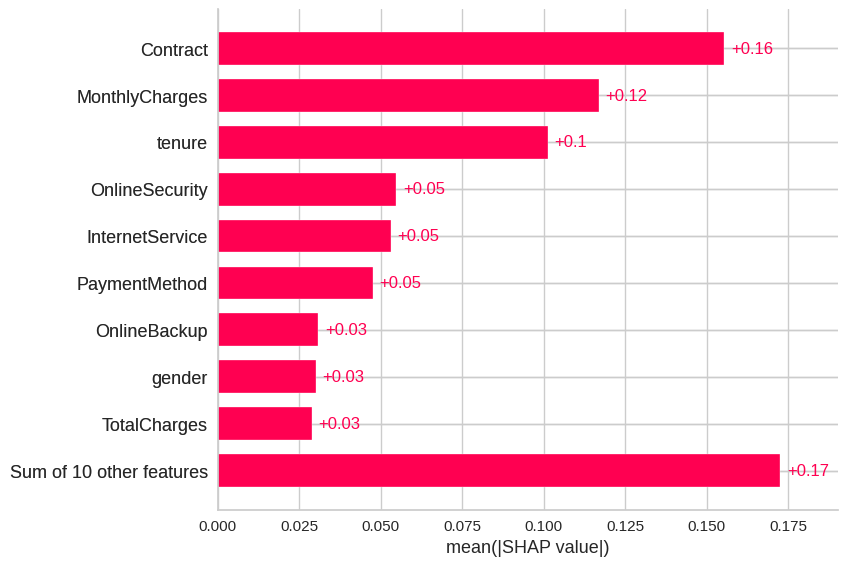

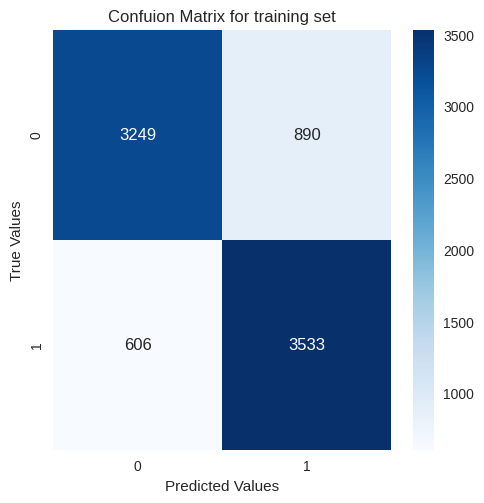

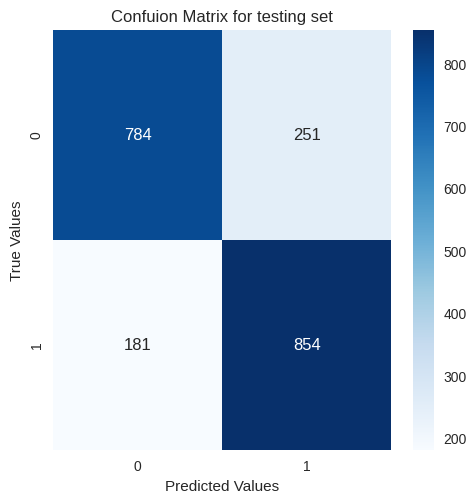

(Accuracy) in the training set is 0.8193 for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='log_loss',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random') model.
(Precision) in the training set is 0.7988 for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='log_loss',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None,
                       splitter='random') model.
(Recall) in the training set is 0.8536 for DecisionTreeClassifier(ccp_alpha=0.0, cl

In [ ]:
churn_prediction(model, X_train, X_test, y_train, y_test)

Model 2: RandomForest

In this step، we use the RandomForestClassifier model.

###Hyperparameter tuning

###Grid_search1

In [ ]:
param_Grid1 = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 15, 20],
               'n_estimators':[80, 90, 100],
               }

rf_model = RandomForestClassifier()
Grid1 = GridSearchCV(estimator=rf_model, param_grid=param_Grid1, scoring='f1', n_jobs=-1, cv=10, verbose=0)
Grid1.fit(X_train, y_train)
y_pred = Grid1.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.8357
(Precision) in the testing set is: 0.8128
(Recall): in the testing set is: 0.8725
(F1-score): in the testing set is: 0.8416


In [ ]:
Grid1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
Grid1.best_score_

0.8393281124059163

In [ ]:
param_Grid2 = {'criterion': ['log_loss'],
               'max_depth':  [15],
               'n_estimators':[100, 300, 500, 1000],
               'min_samples_split':[2, 4, 6, 10],
               'min_samples_leaf':[2, 4, 6, 10]
               }

rf_model = RandomForestClassifier()
Grid2 = GridSearchCV(estimator=rf_model, param_grid=param_Grid2, scoring='f1', n_jobs=-1, cv=10, verbose=0)
Grid2.fit(X_train, y_train)
y_pred = Grid2.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.8324
(Precision) in the testing set is: 0.8116
(Recall): in the testing set is: 0.8657
(F1-score): in the testing set is: 0.8378


In [ ]:
Grid2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=300, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
Grid2.best_score_

0.8319279150616812

Grid_search3

In [ ]:
param_Grid3 = {'criterion': ['entropy','gini'],
               'max_depth':  [15,10],
               'n_estimators':[ 300,1000],
               'min_samples_split':[4],
               'min_samples_leaf':[2],
               'class_weight':[{0:1, 1:1},{0:2, 1:1},{0:1, 1:2}]
               }

rf_model = RandomForestClassifier()
Grid3 = GridSearchCV(estimator=rf_model, param_grid=param_Grid3, scoring='f1', n_jobs=-1, cv=10, verbose=0)
Grid3.fit(X_train, y_train)
y_pred = Grid3.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.8309
(Precision) in the testing set is: 0.7885
(Recall): in the testing set is: 0.9043
(F1-score): in the testing set is: 0.8425


In [ ]:
Grid3.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                       criterion='entropy', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=1000, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
Grid3.best_score_

0.8374718856646428

###Grid_search4

In [ ]:
param_Grid4 = {'criterion': ['entropy','log_loss'],
               'max_depth':  [15],
               'n_estimators':[ 300],
               'min_samples_split':[4],
               'min_samples_leaf':[2],
               }

rf_model = RandomForestClassifier()
Grid4 = GridSearchCV(estimator=rf_model, param_grid=param_Grid4, scoring='f1', n_jobs=-1, cv=10, verbose=0)
Grid4.fit(X_train, y_train)
y_pred = Grid4.predict(X_test)
cl_rep = classification_report(y_test, y_pred)




accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"(Accuracy) in the testing set is : {accuracy:.4f}")
print(f"(Precision) in the testing set is: {precision:.4f}")
print(f"(Recall): in the testing set is: {recall:.4f}")
print(f"(F1-score): in the testing set is: {f1:.4f}")

(Accuracy) in the testing set is : 0.8324
(Precision) in the testing set is: 0.8099
(Recall): in the testing set is: 0.8686
(F1-score): in the testing set is: 0.8382


In [ ]:
Grid4.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=300, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
Grid4.best_score_

0.8309200706923303

In [ ]:
model_1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=300, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

PermutationExplainer explainer: 2071it [40:09,  1.17s/it]


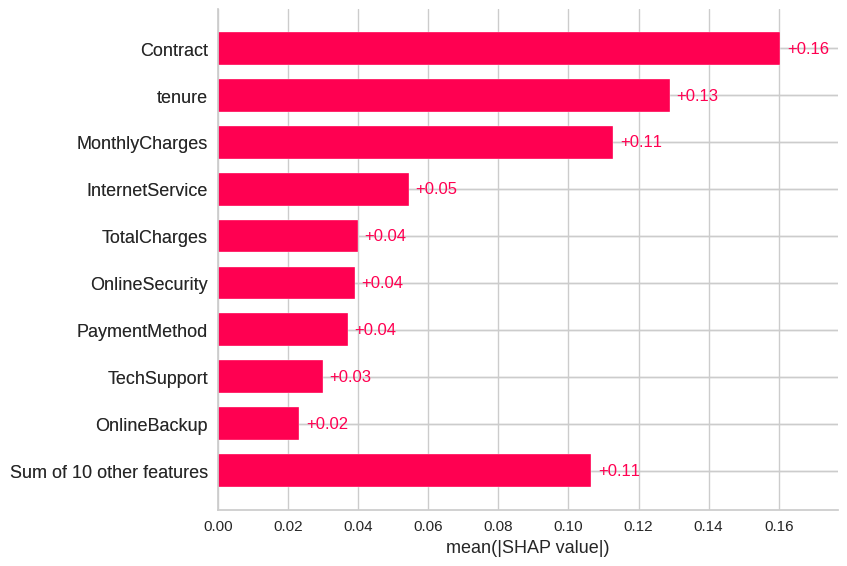

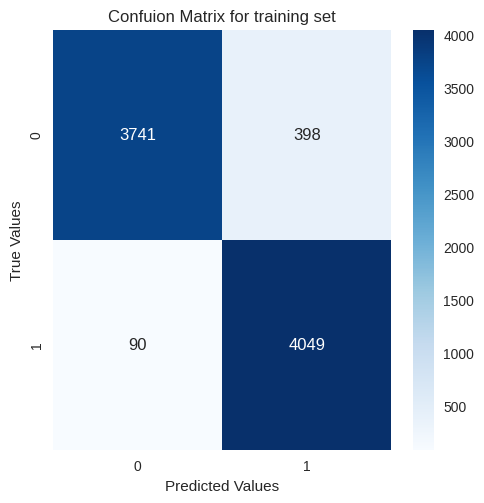

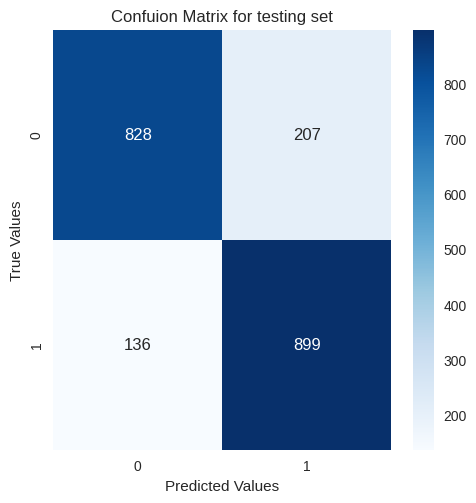

(Accuracy) in the training set is 0.9410 for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=300, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False) model.
(Precision) in the training set is 0.9105 for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,

In [ ]:
churn_prediction(model_1, X_train, X_test, y_train, y_test)

As it turns out, the model has a low bias but a lot of variance. So we n_estimator reduce the amount of max_depth.

In [ ]:
model_2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=500, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

PermutationExplainer explainer: 2071it [1:05:41,  1.91s/it]


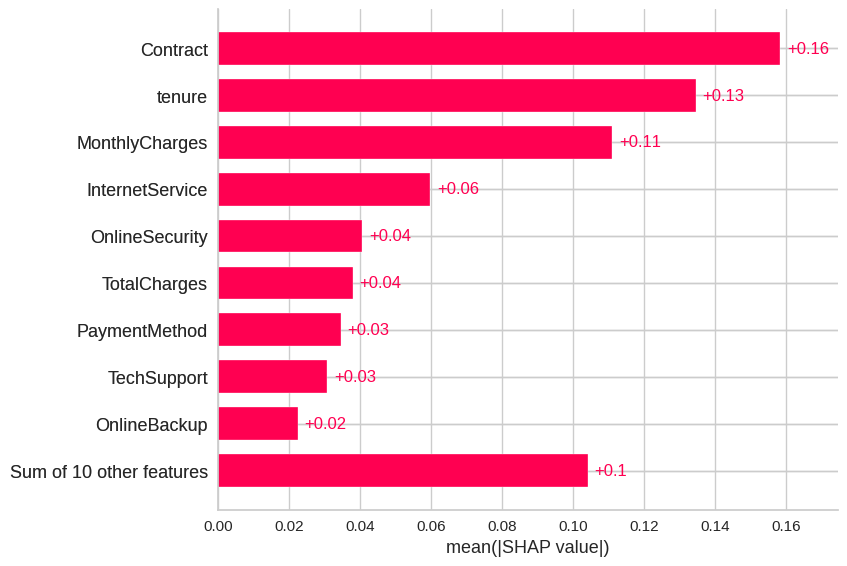

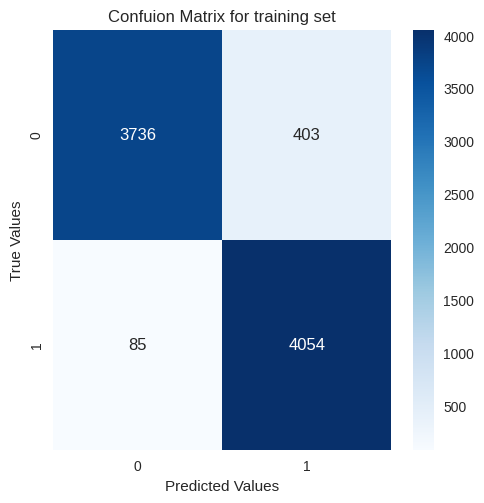

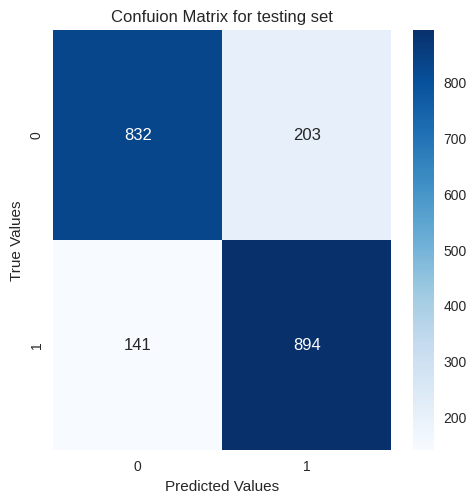

(Accuracy) in the training set is 0.9410 for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=500, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False) model.
(Precision) in the training set is 0.9096 for RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='log_loss', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,

In [ ]:
churn_prediction(model_2, X_train, X_test, y_train, y_test)